In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [4]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')
lhg_rtu_path = os.path.join(main_dir, r'lhg_rtu.csv')

In [5]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

lhg_rtu = pd.read_csv(lhg_rtu_path, sep=',', index_col=0) # , skiprows=1
lhg_rtu.index = pd.to_datetime(lhg_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

In [6]:
# Ausreißer manuell auf np.nan setzen
WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

In [7]:
# reindex, sodass keine Timestamp lücken vorhanden sind

start_date = WS100_rtu.index.min()
end_date = WS100_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
WS100_rtu = WS100_rtu.reindex(new_index)

start_date = WS300_rtu.index.min()
end_date = WS300_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
WS300_rtu = WS300_rtu.reindex(new_index)

start_date = Raine_rtu.index.min()
end_date = Raine_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
Raine_rtu = Raine_rtu.reindex(new_index)

start_date = L_pcp_rtu.index.min()
end_date = L_pcp_rtu.index.max()
new_index = pd.date_range(start=start_date - datetime.timedelta(minutes=1), end=end_date, freq='min')
L_pcp_rtu = L_pcp_rtu.reindex(new_index)

start_date = lhg_rtu.index.min()
end_date = lhg_rtu.index.max()
new_index = pd.date_range(start=start_date - datetime.timedelta(minutes=5) - datetime.timedelta(hours=1), end=end_date, freq='5min')
lhg_rtu = lhg_rtu.reindex(new_index)

In [8]:
# precipitation_type für WS100

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [19]:
def histogramm_scatter(data, column):

    station = list_nan_sequences(data, column, 1)

    absolute_frequencies = np.unique(station, return_counts=True)

    x = absolute_frequencies[0]
    y = absolute_frequencies[1]

    hist = np.histogram(station, bins=[10**i for i in range(7)])[0]

    # plot
    fig, ax = plt.subplots()

    ax.scatter(x, y, marker='.', alpha=0.5, edgecolors='none', s=100)

    plt.hlines(hist[0], 1, 10, color='r', linestyle='--', label='absolute Häufigkeit im Intervall 10**i')
    plt.hlines(hist[1], 10, 100, color='r', linestyle='--')
    plt.hlines(hist[2], 100, 1000, color='r', linestyle='--')
    plt.hlines(hist[3], 1000, 10000, color='r', linestyle='--')
    plt.hlines(hist[4], 10000, 100000, color='r', linestyle='--')
    plt.hlines(hist[5], 100000, 1000000, color='r', linestyle='--')

    plt.vlines(1, 0, hist[0], color='r', linestyle='--')
    plt.vlines(10, 0, hist[0], color='r', linestyle='--')
    plt.vlines(10, 0, hist[1], color='r', linestyle='--')
    plt.vlines(100, 0, hist[1], color='r', linestyle='--')
    plt.vlines(100, 0, hist[2], color='r', linestyle='--')
    plt.vlines(1000, 0, hist[2], color='r', linestyle='--')
    plt.vlines(1000, 0, hist[3], color='r', linestyle='--')
    plt.vlines(10000, 0, hist[3], color='r', linestyle='--')
    plt.vlines(10000, 0, hist[4], color='r', linestyle='--')
    plt.vlines(100000, 0, hist[4], color='r', linestyle='--')
    plt.vlines(100000, 0, hist[5], color='r', linestyle='--')
    plt.vlines(1000000, 0, hist[5], color='r', linestyle='--')

    plt.xscale('log')
    ticks = [10**i for i in range(6)]  # Erzeugt eine Liste [1, 10, 100, 1000]
    plt.xticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

    plt.yscale('log')
    plt.yticks(ticks, labels=ticks)  # Setzt die y-Achsenwerte und -Beschriftungen

    plt.xlabel('Länge der nan-Sequenz')
    plt.ylabel('Absolute Häufigkeit')
    plt.title('Längen und absolute Häufigkeiten der nan-Sequenzen, Station: ' + column)

    plt.legend()

    plt.show()

    return

In [9]:
def list_nan_sequences(dataframe, column, min_len):

    dataframe = dataframe
    dataframe_mask = dataframe.isna()
    column = column

    list = []

    count = 0
    index_count = 0

    for value in dataframe_mask[column]:
        if value == True:
            if count == 0:    
                index_start = dataframe[column].index[index_count]
                count += 1
            else:
                count += 1
                if dataframe[column].index[index_count] == dataframe[column].index[-1]:
                    index_end = dataframe[column].index[index_count]
                    if count < min_len:
                        pass
                    else:
                        list.append(count) # , index_start, index_end])

        else:
            if count == 0:
                pass
            else:
                index_end = dataframe[column].index[index_count - 1]
                if count < min_len:
                    pass
                else:
                    list.append(count) # , index_start, index_end])
                count = 0
        index_count += 1

    print('Count of nan sequences with min len ' + str(min_len) + ':', len(list))

    return list

In [63]:
# nan die alleine Stehen zu 0 machen

station_touse = WS100_rtu
column = 'precipitation.1'

station = station_touse.copy()

mask_isna = station[column].isna()

if station.index.diff()[2] == datetime.timedelta(minutes=1):
    td = datetime.timedelta(minutes=1)
elif station.index.diff()[2] == datetime.timedelta(minutes=5):
    td = datetime.timedelta(minutes=5)

list_station = list_nan_sequences(station, column, 1)
x, y = np.unique(list_station, return_counts=True)
dic = dict(zip(x, y))
print('\nnan-Sequenz Länge und Vorkommen:', dic, '\n')

for value, index in zip(mask_isna, mask_isna.index):
    if value == True:
        if index == mask_isna.index[0] or index == mask_isna.index[-1]:
            pass
        elif mask_isna.loc[index - td] == False and mask_isna.loc[index + td] == False:
            station[column].loc[index] = 0
            # print(index)

Count of nan sequences with min len 1: 7

nan-Sequenz Länge und Vorkommen: {3: 1, 4: 3, 9: 1, 25: 1, 92: 1} 



Count of nan sequences with min len 1: 7


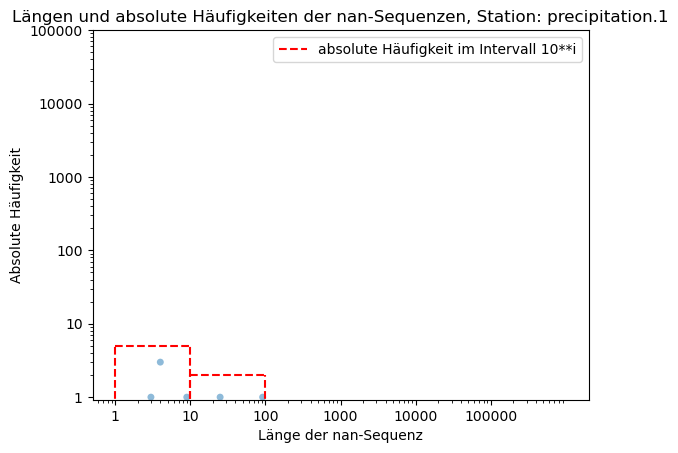

In [64]:
histogramm_scatter(station_touse, column)

Count of nan sequences with min len 1: 7


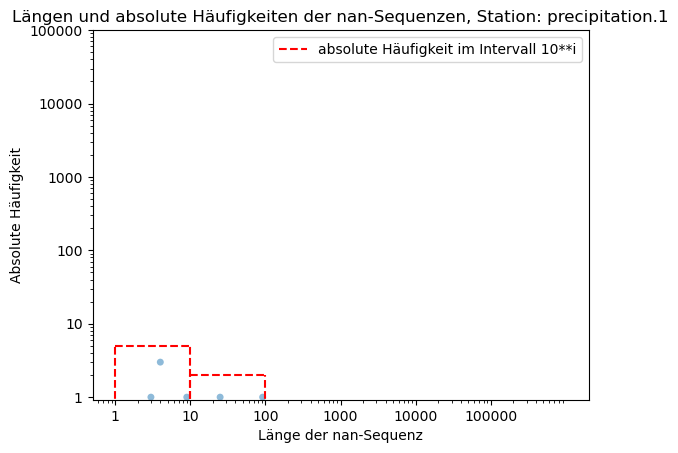

In [65]:
histogramm_scatter(station, column)

In [34]:
mask = WS100_rtu['precipitation.1'].isna() & WS100_rtu['precipitation.1'].shift(-1).notnull() & WS100_rtu['precipitation.1'].shift(1).notnull()

In [60]:
mask1 = WS100_rtu['precipitation.1'].isna() & WS100_rtu['precipitation.1'].shift(-1).notnull() & WS100_rtu['precipitation.1'].shift(1).isna() & WS100_rtu['precipitation.1'].shift(2).notnull()
# val nan nan val
mask2 = WS100_rtu['precipitation.1'].isna() & WS100_rtu['precipitation.1'].shift(-1).isna() & WS100_rtu['precipitation.1'].shift(1).notnull() & WS100_rtu['precipitation.1'].shift(-2).notnull()
# val nan nan val

In [45]:
mask1[mask1 == True]

2021-11-05 08:32:00    True
2021-12-29 00:25:00    True
2022-11-21 16:22:00    True
Name: precipitation.1, dtype: bool

In [53]:
mask2[mask2 == True]

2021-11-05 08:31:00    True
2021-12-29 00:24:00    True
2022-11-21 16:21:00    True
Name: precipitation.1, dtype: bool

In [61]:
mask12 = mask1 | mask2

In [57]:
mask12[mask12 == True]

2021-11-05 08:31:00    True
2021-11-05 08:32:00    True
2021-12-29 00:24:00    True
2021-12-29 00:25:00    True
2022-11-21 16:21:00    True
2022-11-21 16:22:00    True
Name: precipitation.1, dtype: bool

In [58]:
WS100_rtu['precipitation.1'][mask12] = 0

In [51]:
mask[mask == True]

Series([], Freq: T, Name: precipitation.1, dtype: bool)

In [62]:
mask12[mask12 == True]

Series([], Freq: T, Name: precipitation.1, dtype: bool)

In [74]:
# nan die alleine Stehen oder nan-Paare zu 0 machen

station_touse = lhg_rtu
column = 'lhg07'
_1seq = True
_2seq = True

station = station_touse[[column]].copy()

# True für alleinstehende nans
mask_1seq = station.isna() & station.shift(-1).notnull() & station.shift(1).notnull()

# True für nan-Paare
mask1 = station.isna() & station.shift(-1).notnull() & station.shift(1).isna() & station.shift(2).notnull()
mask2 = station.isna() & station.shift(-1).isna() & station.shift(1).notnull() & station.shift(-2).notnull()
maske_2seq = mask1 | mask2

if _1seq == True:
    station[mask_1seq] = 0
if _2seq == True:
    station[maske_2seq] = 0

Count of nan sequences with min len 1: 8729


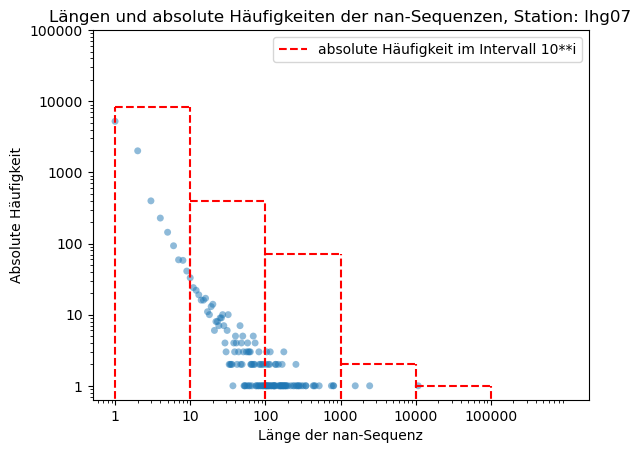

In [70]:
histogramm_scatter(station_touse, column)

Count of nan sequences with min len 1: 1494


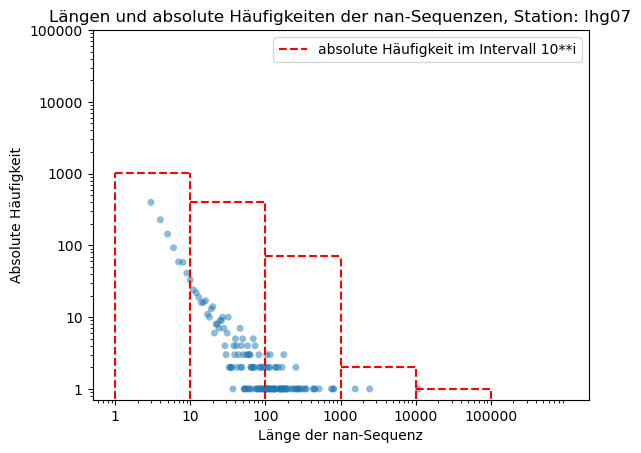

In [75]:
histogramm_scatter(station, column)